The following code trains and tests models on the Cat Recognition dataset with varying Train Dataset Sizes, and then plots graphs of Test Prediction Accuracy against Train Dataset Size and Training Time against Train Dataset Size.

'Progress: Complete'

Test Prediction Accuracies Regression Line Gradient: 0.18
Training Times Regression Line Gradient: 0.08


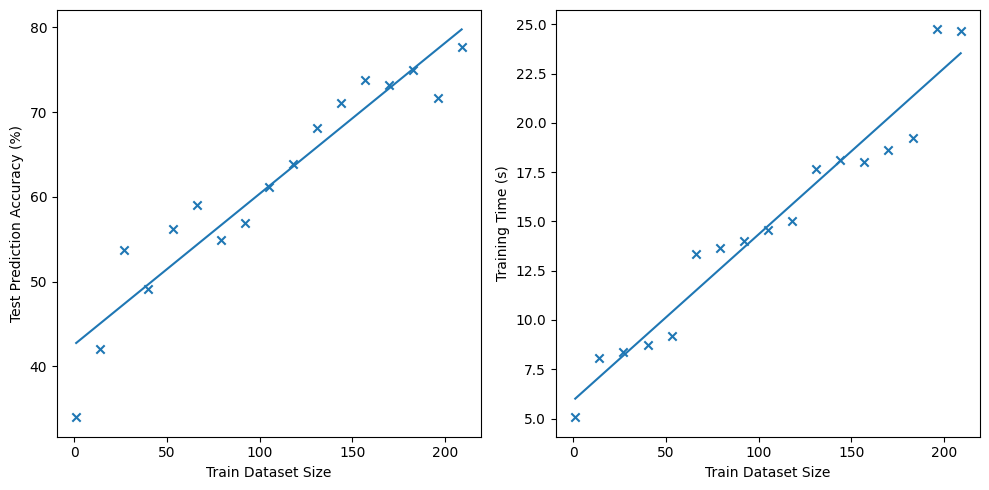

In [1]:
from IPython.display import clear_output, display
import os

import matplotlib.pyplot as plt
import numpy as np

from school_project.models.gpu.cat_recognition import CatRecognitionModel as Model

# Change to root directory of project
os.chdir(os.getcwd())

# Set width and height of figure
plt.rcParams["figure.figsize"] = [10, 5]

# Generate list of train dataset sizes from 1 to 210, incremented by 13
train_dataset_sizes = np.array(list(range(1, 210, 13))) 

test_prediction_accuracies = np.array([])
training_times = np.array([])

for index, train_dataset_size in enumerate(train_dataset_sizes):
    clear_output(wait=True)
    display(f"Progress: {round(number=index/len(train_dataset_sizes) * 100, ndigits=2)}%")

    model = Model(hidden_layers_shape=[100, 100],
                  train_dataset_size=train_dataset_size,
                  learning_rate=0.1,
                  use_relu=True)
    model.create_model_values()
    model.train(epoch_count=2_000)
    model.test()

    test_prediction_accuracies = np.append(test_prediction_accuracies, 
                                           model.test_prediction_accuracy)
    training_times = np.append(training_times,
                               model.training_time)
    
clear_output(wait=True)
display("Progress: Complete")

figure, axis = plt.subplots(nrows=1, ncols=2)

# Determine gradient and y-intercept of prediction accuracies regression line
m, c = np.polyfit(train_dataset_sizes, test_prediction_accuracies, deg=1)
print(f"Test Prediction Accuracies Regression Line Gradient: {round(number=m, ndigits=2)}")

axis[0].set_xlabel("Train Dataset Size")
axis[0].set_ylabel("Test Prediction Accuracy (%)")

# Plot scatter graph of train dataset sizes and prediction accuracies
axis[0].scatter(train_dataset_sizes, test_prediction_accuracies, marker='x')

axis[0].plot(train_dataset_sizes, m * train_dataset_sizes + c)

# Determine gradient and y-intercept of training times regression line
m, c = np.polyfit(train_dataset_sizes, training_times, deg=1)
print(f"Training Times Regression Line Gradient: {round(number=m, ndigits=2)}")

axis[1].set_xlabel("Train Dataset Size")
axis[1].set_ylabel("Training Time (s)")

# Plot scatter graph of train dataset sizes and training times
axis[1].scatter(train_dataset_sizes, training_times, marker='x')

# Plot regression line
axis[1].plot(train_dataset_sizes, m * train_dataset_sizes + c)

plt.tight_layout()
plt.show()

As shown above, as the train dataset size increases so does both the prediction accuracy and the training time taken. Therefore, I can predict that if I increase the size of the Cat Recognition dataset, I could improve the accuracy of the model trained on the dataset.